In [3]:
import io
import requests
import pandas as pd

url = "https://www.stata-press.com/data/r12/air2.dta"

response = requests.get(url)
response.raise_for_status()

with io.BytesIO(response.content) as f:
    df = pd.read_stata(f)

In [5]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [6]:
df.head()

,air,time,t
0,112,1949.000000,1.0
1,118,1949.083374,2.0
2,132,1949.166626,3.0
3,129,1949.250000,4.0
4,121,1949.333374,5.0


In [7]:
df.set_index('time',inplace=True)

In [8]:
df.head()

,air,t
time,,
1949.000000,112,1.0
1949.083374,118,2.0
1949.166626,132,3.0
1949.250000,129,4.0
1949.333374,121,5.0


In [10]:
model = sm.tsa.statespace.SARIMAX(df['air'],order=(1,0,0))
results = model.fit()

C:\Users\Sanjana Shankar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sanjana Shankar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sanjana Shankar\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [11]:
pred = results.predict()

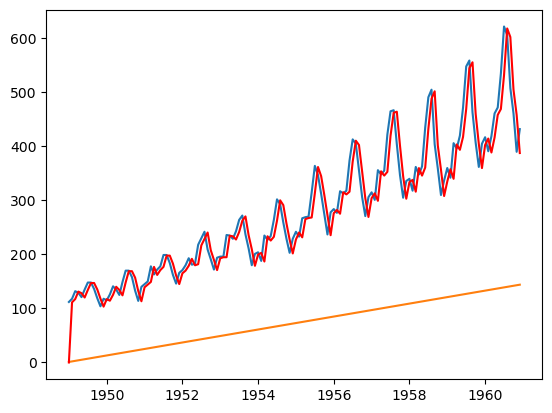

In [14]:
plt.plot(df)
plt.plot(pred,color='red')